In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import thinkstats2
import thinkplot


In [2]:
data = pd.read_csv("Train.csv")

In [3]:
data.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [4]:
data.isnull().sum()

date_time              0
is_holiday             0
air_pollution_index    0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
weather_description    0
traffic_volume         0
dtype: int64

In [5]:
data.dtypes

date_time               object
is_holiday              object
air_pollution_index      int64
humidity                 int64
wind_speed               int64
wind_direction           int64
visibility_in_miles      int64
dew_point                int64
temperature            float64
rain_p_h               float64
snow_p_h               float64
clouds_all               int64
weather_type            object
weather_description     object
traffic_volume           int64
dtype: object

In [6]:
data.date_time = pd.to_datetime(data.date_time)

In [7]:
data.date_time.head()

0   2012-10-02 09:00:00
1   2012-10-02 10:00:00
2   2012-10-02 11:00:00
3   2012-10-02 12:00:00
4   2012-10-02 13:00:00
Name: date_time, dtype: datetime64[ns]

In [8]:
data['year'] = data['date_time'].dt.year
data['month'] = data['date_time'].dt.month
data['day'] = data['date_time'].dt.day
data['dayofweek'] = data['date_time'].dt.dayofweek.replace([0,1,2,3,4,5,6],['monday','tuesday','wednesday','thursday','friday','saturday','sunday'])
data['hour'] = data['date_time'].dt.hour
data.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,year,month,day,dayofweek,hour
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,2,tuesday,9
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,2,tuesday,10
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,2,tuesday,11
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,2,tuesday,12
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,2,tuesday,13


In [57]:
data.describe()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume,year,month,day,hour
count,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,154.841422,71.209007,3.378193,199.471852,4.989748,4.989748,6.919587,0.448739,0.000318,50.458785,3240.118163,2014.639822,6.407674,15.646874,11.404385
std,83.735515,16.852248,2.055792,99.841088,2.570021,2.570021,13.415256,53.526500,0.009760,38.871734,1991.487289,1.572845,3.543241,8.700568,6.951078
min,10.000000,13.000000,0.000000,0.000000,1.000000,1.000000,-273.150000,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000,1.000000,0.000000
25%,83.000000,60.000000,2.000000,130.000000,3.000000,3.000000,-1.430000,0.000000,0.000000,1.000000,1165.250000,2013.000000,3.000000,8.000000,5.000000
50%,155.000000,72.000000,3.000000,200.000000,5.000000,5.000000,7.000000,0.000000,0.000000,64.000000,3335.000000,2015.000000,6.000000,16.000000,11.000000
75%,228.000000,85.000000,5.000000,290.000000,7.000000,7.000000,17.470000,0.000000,0.000000,90.000000,4926.000000,2016.000000,10.000000,23.000000,17.000000
max,299.000000,100.000000,16.000000,360.000000,9.000000,9.000000,35.090000,9831.300000,0.510000,100.000000,7280.000000,2017.000000,12.000000,31.000000,23.000000


Text(0, 0.5, 'Traffic Volume')

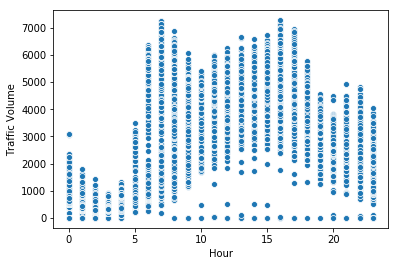

In [10]:
sns.scatterplot(x = data['hour'], y = data['traffic_volume'])
plt.xlabel("Hour")
plt.ylabel("Traffic Volume")

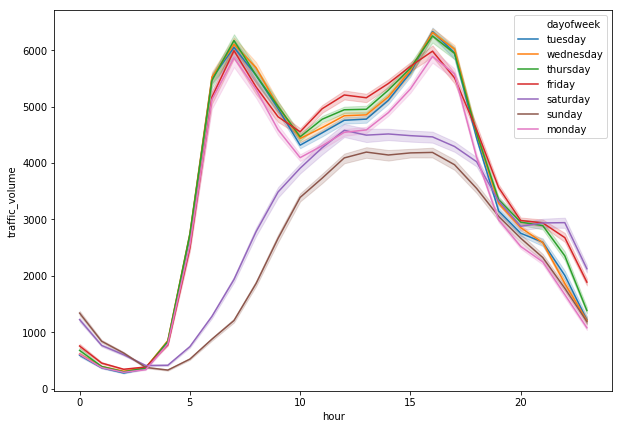

In [11]:
plt.figure(figsize=(10,7))
sns.lineplot(x=data['hour'],y=data['traffic_volume'],hue=data['dayofweek'])

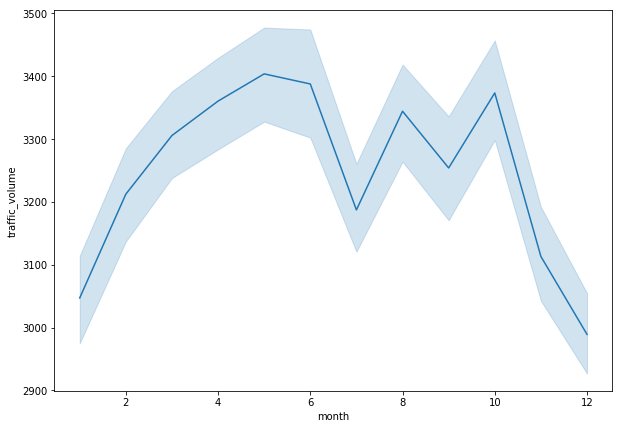

In [12]:
plt.figure(figsize=(10,7))
sns.lineplot(x=data['month'],y=data['traffic_volume'])

In [13]:
weather = data.groupby('weather_type')

Text(0, 0.5, 'Traffic Volume')

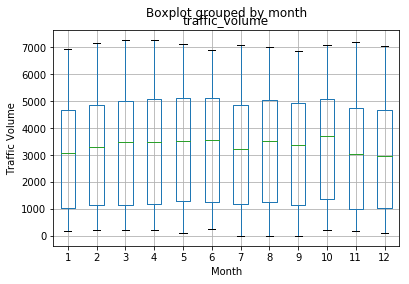

In [14]:
data.boxplot('traffic_volume',by = 'month')
plt.xlabel("Month")
plt.ylabel("Traffic Volume")

Text(0, 0.5, 'Month')

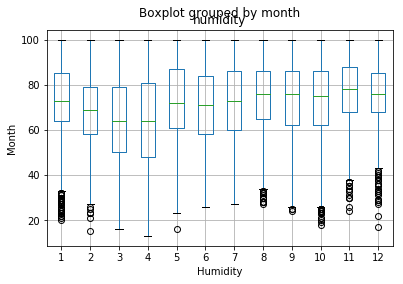

In [59]:
data.boxplot('humidity',by = 'month')
plt.xlabel('Humidity')
plt.ylabel('Month')

In [16]:
data.columns

Index(['date_time', 'is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point',
       'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type',
       'weather_description', 'traffic_volume', 'year', 'month', 'day',
       'dayofweek', 'hour'],
      dtype='object')

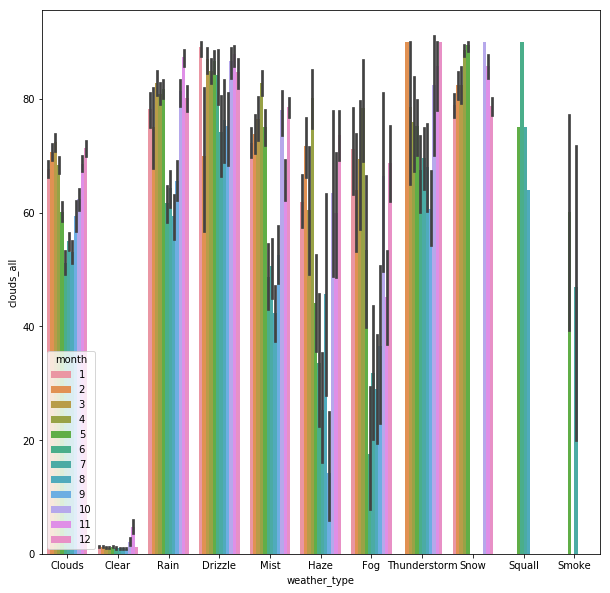

In [17]:
plt.figure(figsize=(10,10))
sns.barplot(x=data['weather_type'],y=data['clouds_all'],hue=data['month'])


In [18]:
data['weather_type'].value_counts()

Clouds          11213
Clear            9233
Mist             4047
Rain             3940
Snow             2070
Drizzle          1204
Haze              902
Fog               567
Thunderstorm      553
Smoke              17
Squall              4
Name: weather_type, dtype: int64

In [20]:
def tempconvert(t):
    return t-273.15

In [21]:
data['temperature']=data['temperature'].apply(tempconvert)

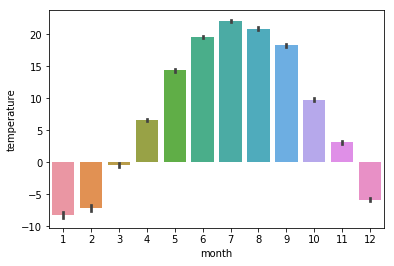

In [22]:
sns.barplot(y='temperature',x='month',data=data)

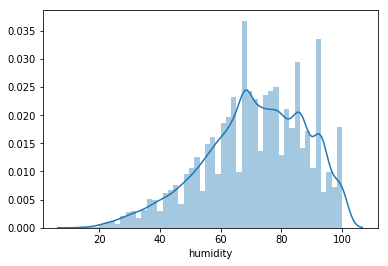

In [23]:
sns.distplot(data['humidity'])

<Figure size 1080x1080 with 0 Axes>

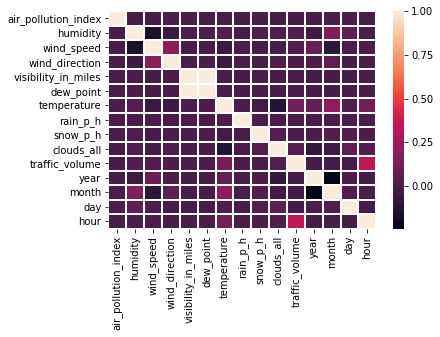

<Figure size 1080x1080 with 0 Axes>

In [24]:
sns.heatmap(data.corr(),linewidth=1)
plt.figure(figsize=(15,15))

In [25]:
data.columns

Index(['date_time', 'is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point',
       'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type',
       'weather_description', 'traffic_volume', 'year', 'month', 'day',
       'dayofweek', 'hour'],
      dtype='object')

In [26]:
data['year'].unique()

array([2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

Text(0.5, 1.0, 'Traffic volume per year')

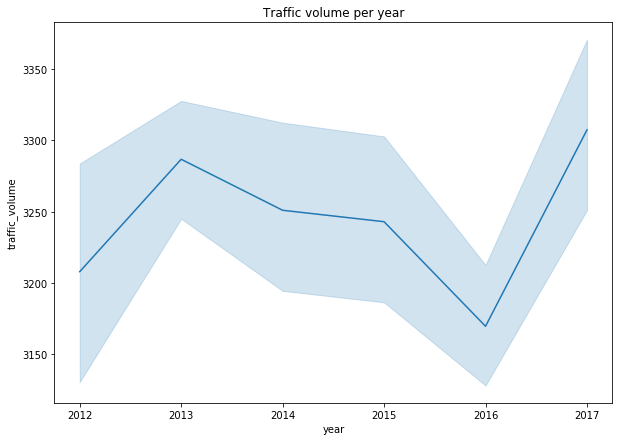

In [27]:
plt.figure(figsize=(10,7))
sns.lineplot(x=data['year'],y=data['traffic_volume'])
plt.title('Traffic volume per year')

Text(0.5, 1.0, 'Air pollution per year')

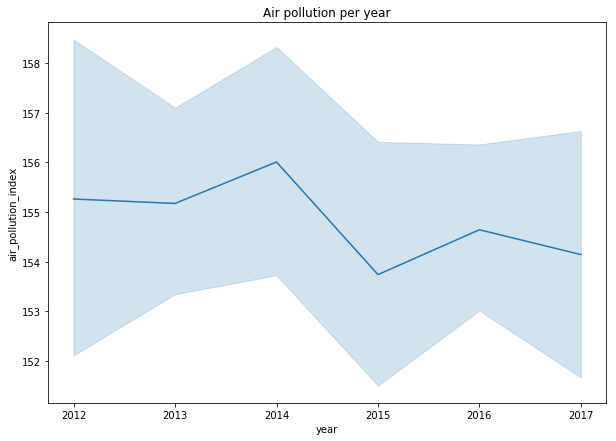

In [28]:
plt.figure(figsize=(10,7))
sns.lineplot(x=data['year'],y=data['air_pollution_index'])
plt.title('Air pollution per year')

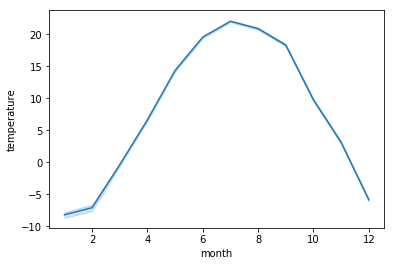

In [29]:
sns.lineplot(x=data['month'],y=data['temperature'])

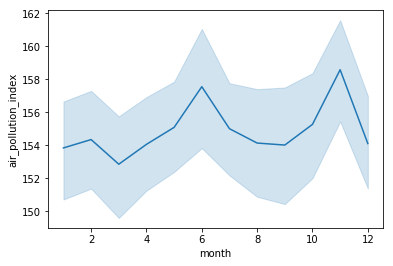

In [30]:
sns.lineplot(x = data['month'],y=data['air_pollution_index'])

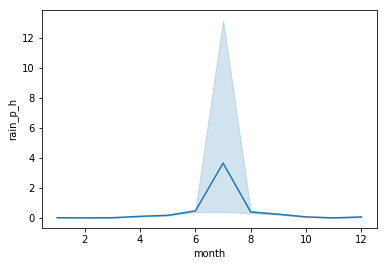

In [31]:
sns.lineplot(x=data['month'],y=data['rain_p_h'])

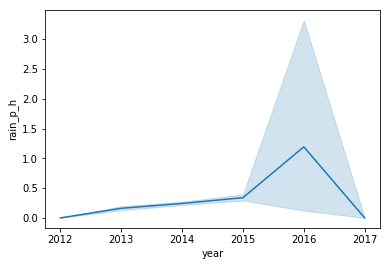

In [32]:
sns.lineplot(x=data['year'],y=data['rain_p_h'])

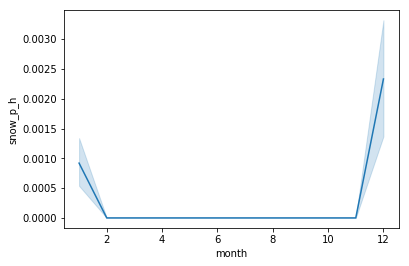

In [33]:
sns.lineplot(x=data['month'],y=data['snow_p_h'])

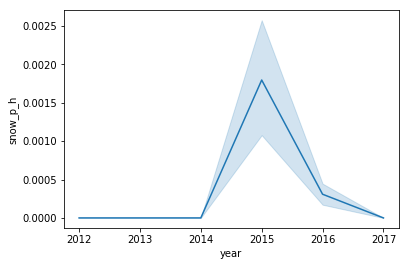

In [34]:
sns.lineplot(x=data['year'],y=data['snow_p_h'])

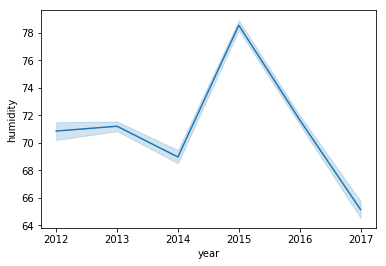

In [35]:
sns.lineplot(x=data['year'],y=data['humidity'])

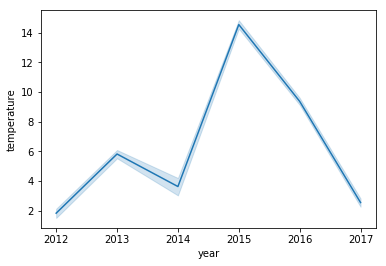

In [36]:
sns.lineplot(x=data['year'],y=data['temperature'])

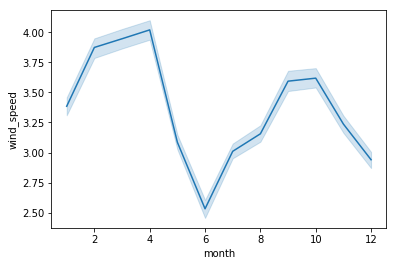

In [37]:
sns.lineplot(x=data['month'],y=data['wind_speed'])

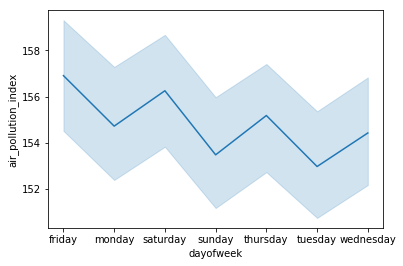

In [38]:
sns.lineplot(x=data['dayofweek'],y=data['air_pollution_index'])

In [39]:
data.columns

Index(['date_time', 'is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point',
       'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type',
       'weather_description', 'traffic_volume', 'year', 'month', 'day',
       'dayofweek', 'hour'],
      dtype='object')

In [40]:
data.skew()

air_pollution_index     -0.009921
humidity                -0.463709
wind_speed               0.732442
wind_direction          -0.294430
visibility_in_miles      0.003257
dew_point                0.003257
temperature             -2.903702
rain_p_h               183.582818
snow_p_h                40.462006
clouds_all              -0.246849
traffic_volume          -0.071139
year                    -0.065644
month                    0.087253
day                      0.027890
hour                     0.028676
dtype: float64

In [41]:
am=data['air_pollution_index'].mean()
hm=data['humidity'].mean()
tm = data['temperature'].median()
tfm = data['traffic_volume'].mean()
print('Air pollution Index: ',am)
print('Humidity: ',hm)
print('Temperature: ',tm)
print('Traffic Volume: ',tfm)

Air pollution Index:  154.84142222222223
Humidity:  71.20900740740741
Temperature:  7.0
Traffic Volume:  3240.1181629629627


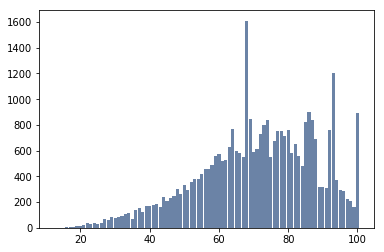

In [42]:
hist = thinkstats2.Hist(data['humidity'])
thinkplot.Hist(hist)

In [43]:
n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
    pmf[x] = freq / n

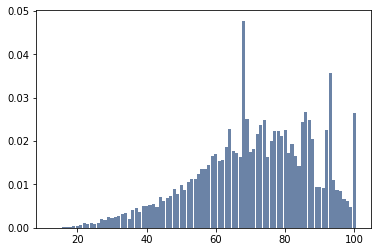

In [44]:
thinkplot.Hist(pmf)

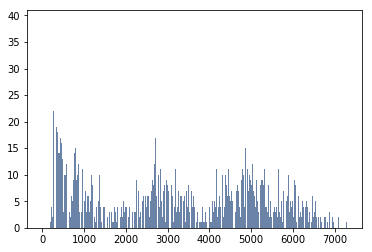

In [45]:
hist = thinkstats2.Hist(data['traffic_volume'])
thinkplot.Hist(hist)

In [46]:
n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
    pmf[x] = freq / n

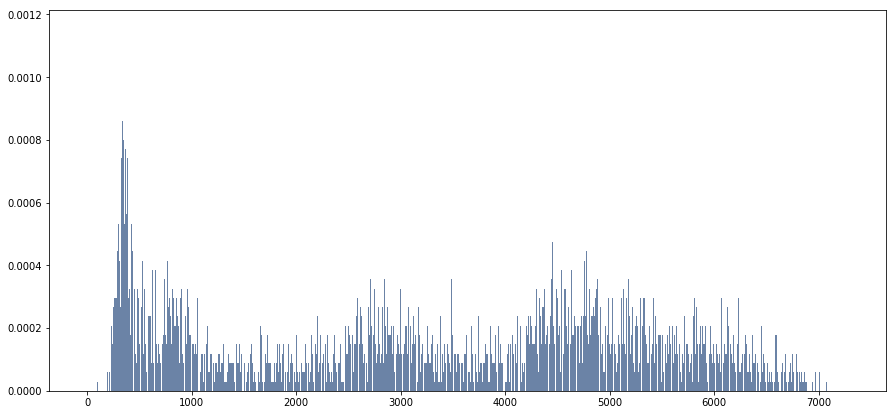

In [47]:
plt.figure(figsize=(15,7))
thinkplot.Hist(pmf)

In [48]:
pmf = thinkstats2.Pmf(data['humidity'], label='actual')

print('mean', pmf.Mean())

mean 71.2090074074074


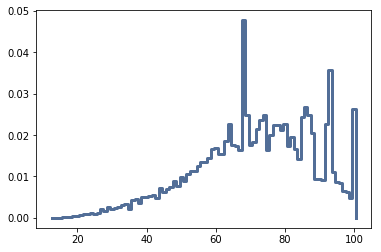

In [49]:
thinkplot.Pmf(pmf)

In [50]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

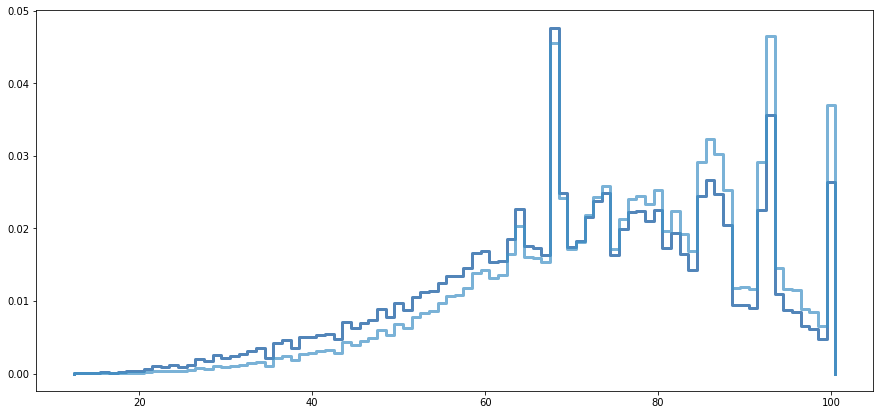

In [51]:
plt.figure(figsize=(15,7))
biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])

In [52]:
print('Actual mean', pmf.Mean())
print('Observed mean', biased_pmf.Mean())

Actual mean 71.2090074074074
Observed mean 75.19712445866193


In [53]:
(biased_pmf.Mean() - pmf.Mean()) / pmf.Mean() * 100

5.60057947225322

{'xscale': 'linear', 'yscale': 'linear'}

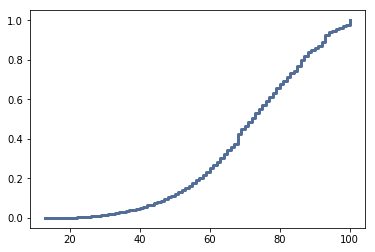

In [54]:
cdf = thinkstats2.Cdf(data['humidity'], label='CDF x')
thinkplot.Cdf(cdf)

In [55]:
cdf.Prob(36)

0.033748148148148145